# Experiments on Time series generation as ARIMA



In [1]:
# automatically reaload libraries (useful when working on libraries while playing with the notebook)
%load_ext autoreload
%autoreload 2

## ARMA models

In [2]:
# allow import from parent directory
import sys,os
sys.path.append(os.getcwd() + '/..')

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# import helper functions for dataset generation
# from ts_gen import make_binary_code_dataset,make_flat_dataset,make_slopes_dataset
# import helper functions for dataset visualization
from ts_viz import plot_list_of_ts,plot_list_of_ts_over_subplots
# import helper functions to adjust list of series according to output of the clustering
# from ts_utils import get_clustered_list

In [5]:
from generator import AR,MA,ARMA,ARIMA,SARIMA



### [Autoregressive model](https://en.wikipedia.org/wiki/Autoregressive_model)

the notation AR(p) refers to the autoregressive model of order p. The AR(p) model is written
<p><center> $X_t = c + \sum_{i=1}^p \phi_i X_{t-i} + \varepsilon_t$ 
<br>
    
where $\phi _{1},\ldots ,\phi _{p}$ are parameters, c is a constant, and the random variable $\varepsilon _{t}$ is white noise. The value of p is called the order of the AR model.

Some constraints are necessary on the values of the parameters so that the model remains stationary. For example, processes in the AR(1) model with ${\displaystyle |\varphi _{1}|\geq 1}$ are not stationary.

The explicit format of the equation above derives from the following compact form, 
<p><center>$(1 - \sum_{i=1}^p \phi_i B^i) X_t = c + \varepsilon_t$ 
<br>
    
which uses the $B$ operator [(Lag or Backshift operator)](https://otexts.com/fpp2/backshift.html). $B^i * X_t$ means $X_{t-1}$. The power of the $B$ operator is that the relevant expressions work as polynomials, allowing to compose complex combinations of parameters and lags. 
    
The importance of the backshift operator notation will be clear in the more complex models.

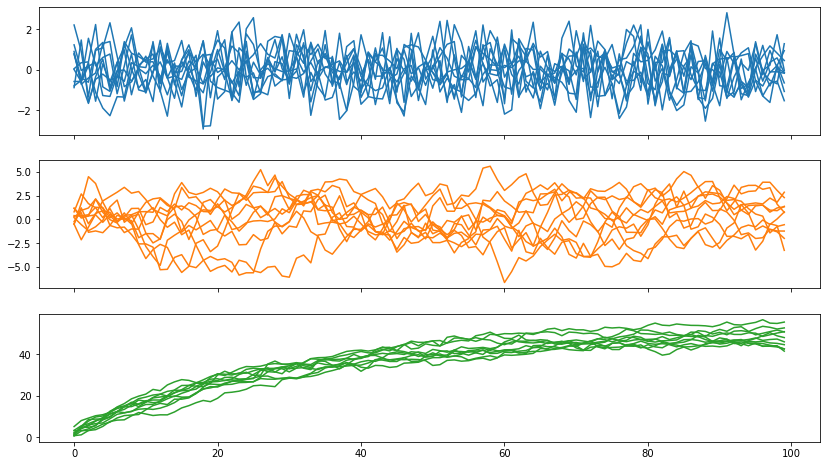

In [6]:
param_list = [{'c' : 0, 'pcoeff' : []},
              {'c' : 0, 'pcoeff' : [1,-0.2,0.1]},
              {'c' : 2, 'pcoeff' : [1.06,-0.5,0.5,-0.1]},]

samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ar = AR(**params)
        list_of_series.append(pd.Series(ar.generate(n=100),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));



### [Moving-Average model](https://en.wikipedia.org/wiki/Moving-average_model)

The notation MA(q) refers to the moving average model of order q:

<p><center> $X_t = \mu + \varepsilon_t - \sum_{i=1}^q \theta_i \varepsilon_{t-i} $
<br>


where $\mu$ is the mean of the series, the $\theta _{1},\ldots ,\theta _{q}$ are the parameters of the model and the  $\varepsilon _{t}, \varepsilon _{t-1},\ldots ,\varepsilon _{t-q}$ are white noise error terms. The value of $q$ is called the order of the MA model.
    
I am using negative sign in front of the $\theta$ parameters to match the sign in the same formula rpresented with the backshift notation
    
<p><center>$X_t = \mu + (1 - \sum_{i=1}^q \theta_i B^i) \varepsilon_t$ 
<br>

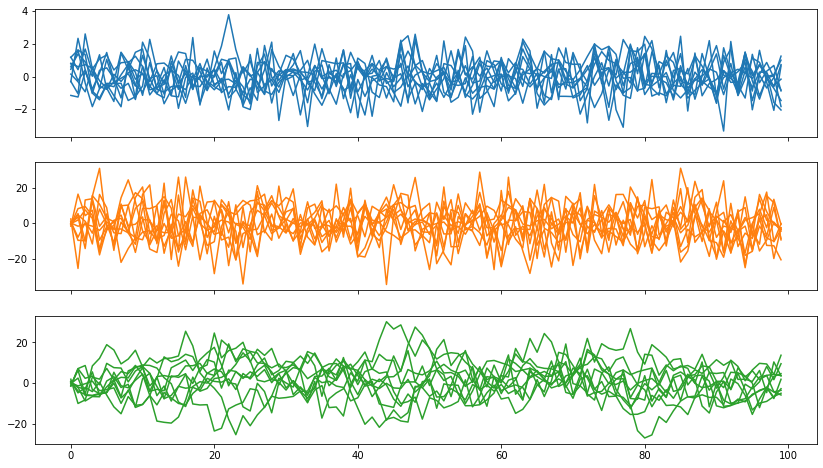

In [9]:
param_list = [{'mu' : 0, 'qcoeff' : []},
              {'mu' : 0, 'qcoeff' : [10]},
              {'mu' : 0, 'qcoeff' : [5,4,3,3,3,3,2,1]}]

samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ma = MA(**params)
        list_of_series.append(pd.Series(ma.generate(),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));



### [Auto-Regressive Moving-Average model](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)

The notation ARMA(p, q) refers to the model with p autoregressive terms and q moving-average terms. This model contains the AR(p) and MA(q) models,

<p><center> $X_t = c + \varepsilon_t + \sum_{i=1}^p \phi_i X_{t-i} - \sum_{i=1}^q \theta_i \varepsilon_{t-i}$ 
<br>
    
where $\varphi _{1},\ldots ,\varphi _{p}$ are parameters of the AR component, c is a constant, the $\theta _{1},\ldots ,\theta _{q}$ are the parameters of the MA model and the $\varepsilon _{t}, \varepsilon _{t-1},\ldots ,\varepsilon _{t-q}$  are white noise error terms. The vaues (p,q) are called the AR and MA orders of the ARMA model.

The ARMA model is essentially an infinite impulse response filter applied to white noise, with some additional interpretation placed on it.

With the backshift polynomial notation the equation is:
    
    
<p><center>$(1 - \sum_{i=1}^p \phi_i B^i) X_t = c + (1 - \sum_{i=1}^q \theta_i B^i) \varepsilon_t$ 
<br>


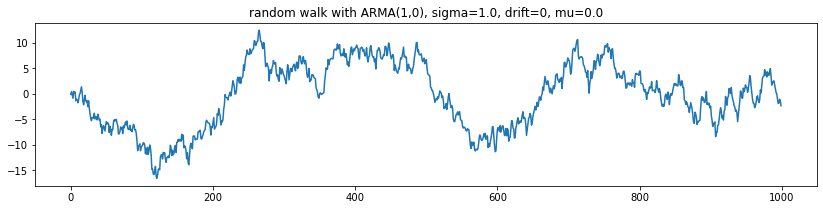

In [10]:
model = ARMA(c=0,pcoeff=[1],qcoeff=[])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'random walk with {str(model)}',figsize=(14,3));

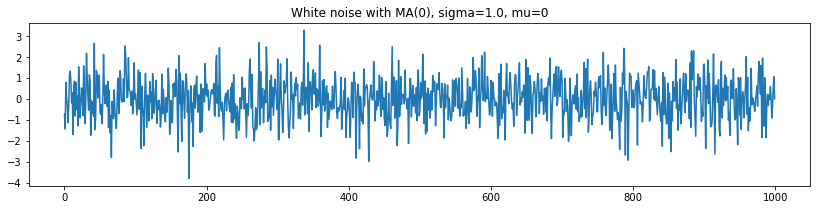

In [12]:
model = MA(mu=0,qcoeff=[])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'White noise with {str(model)}',figsize=(14,3));

0.48256852568479536


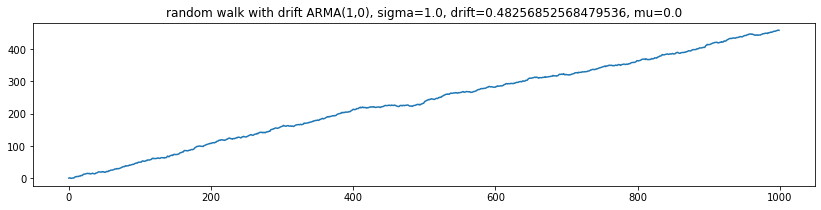

In [13]:
c = random.random() - 0.5
print(c)
model = ARMA(c=c,pcoeff=[1],qcoeff=[])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'random walk with drift {str(model)}',figsize=(14,3));

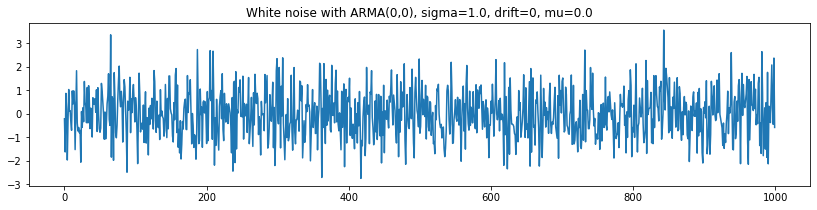

In [14]:
model = ARMA(c=0,pcoeff=[],qcoeff=[])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'White noise with {str(model)}',figsize=(14,3));

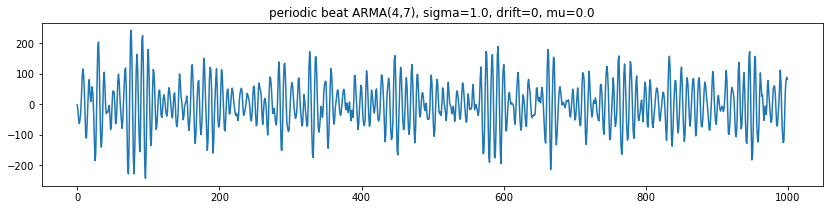

In [15]:
model = ARMA(c=0,pcoeff=[1,-1,0.5,-0.5],qcoeff=[-11,-10,-5,0,5,10,11])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'periodic beat {str(model)}',figsize=(14,3));

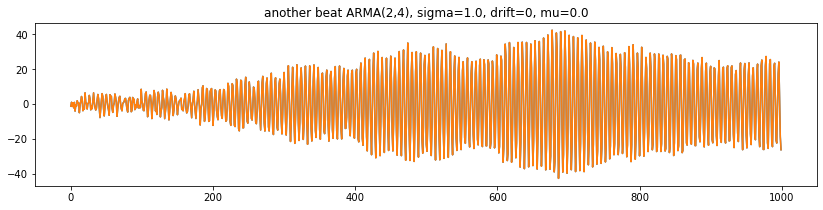

In [16]:
model = ARMA(c=0,pcoeff=[1,-1],qcoeff=[2,-2,1,-1])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'ARMA({len(model.pcoeff)},{len(model.qcoeff)})',figsize=(14,3));
s1.plot(title=f'another beat {str(model)}',figsize=(14,3));

## ARIMA models



### [Auto-Regressive Integrated Moving-Average model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)

An ARIMA(p,d,q) process is given by:


<p><center>$(1 - \sum_{i=1}^p \phi_i B^i) (1 - B)^d X_t = (1 - \sum_{i=1}^q \theta_i B^i)  \varepsilon_t$ 
<br>


where $B$ is the BAckshift / Lag operator, $d$ if the order of integration,  $\phi _{1},\ldots ,\phi _{p}$ are parameters of the AR component of the model, the $\theta _{1},\ldots ,\theta _{q}$ are the parameters of the MA model and the  $\varepsilon _{t}, \varepsilon _{t-1},\ldots ,\varepsilon _{t-q}$  are white noise error terms.

    
The use of the backshitf operator allows to compute the equivalent ARMA model by expanding the products and bring the equation in the form $X_t = ... $

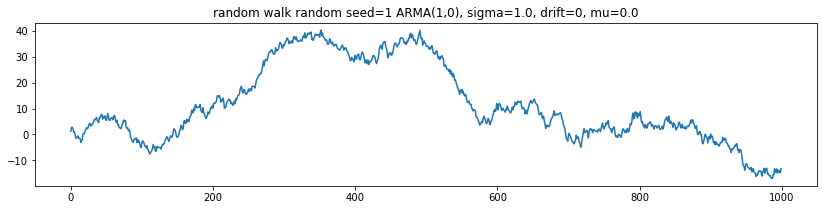

In [17]:
random.seed(1)
model = ARMA(c=0,pcoeff=[1])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'random walk random seed=1 {str(model)}',figsize=(14,3));

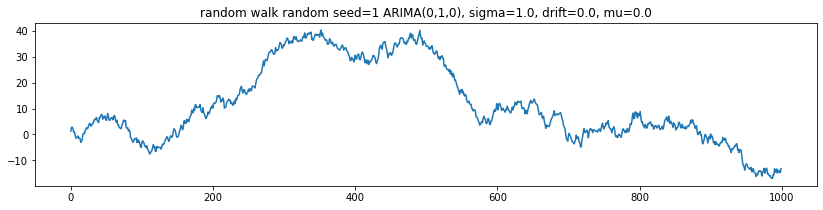

In [18]:
random.seed(1)
model = ARIMA(d=1)
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'random walk random seed=1 {str(model)}',figsize=(14,3));

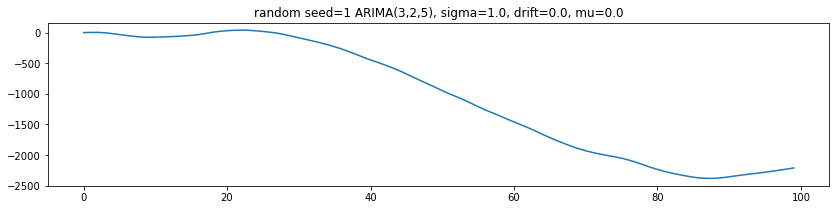

In [19]:
random.seed(1)
model = ARIMA(pcoeff=[1,-1,0.5],d=2,qcoeff=[1,1,1,1,1])
s1 = pd.Series(model.generate(100))
s1.plot(title=f'random seed=1 {str(model)}',figsize=(14,3));

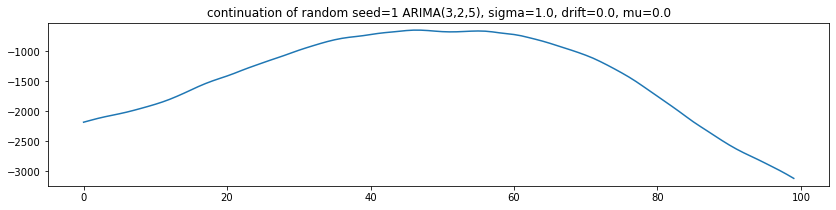

In [20]:
s1 = pd.Series(model.generate(100))
s1.plot(title=f'continuation of random seed=1 {str(model)}',figsize=(14,3));

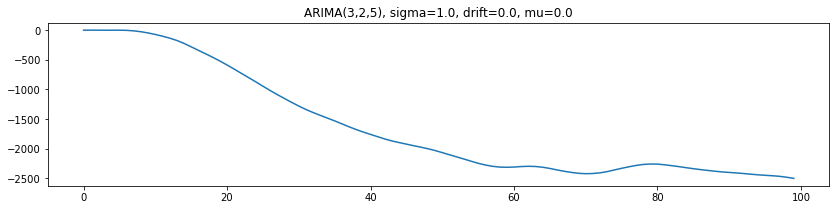

In [21]:
random.seed()
model = ARIMA(pcoeff=[1,-1,0.5],d=2,qcoeff=[1,1,1,1,1])
s1 = pd.Series(model.generate(100))
s1.plot(title=f'{str(model)}',figsize=(14,3));

## SARIMA models



### [Seasonal Auto-Regressive Integrated Moving-Average model](https://otexts.com/fpp2/seasonal-arima.html)



A $SARIMA(p,d,q)(P,D,Q)m$ process is given by:

$(1 - \sum_{i=1}^p \phi_i B^i) (1 - B)^d (1 - \sum_{i=1}^P \Phi_i B^{i*m}) (1 - B^m)^D y_t = (1 - \sum_{i=1}^q \theta_i B^i)  (1 - \sum_{i=1}^Q \Theta_i B^{i*m}) \varepsilon_t$ 


where :
- $B$ is the Backshift / Lag operator
- $d$ is the order of integration,  
- $\phi _{1},\ldots ,\phi _{p}$ are parameters of the AR component of the model
- $\theta _{1},\ldots ,\theta _{q}$ are the parameters of the MA model 
- $\varepsilon _{t}, \varepsilon _{t-1},\ldots ,\varepsilon _{t-q}$  are white noise error terms.
- $m$ is the seasonal periond (e.g. 12 if series is monthly, 7 if weekly etc.)
- $D$ is the order of seasonal integration
- $\Phi_{1},\ldots,\Phi_P$ are are seasonal Auto Regressive parameters
- $\Theta_{1},\ldots,\Theta_Q$ are are seasonal Auto Regressive parameters
    
The use of the backshitf operator allows to compute the equivalent ARMA model by expanding the products and bring the equation in the form $X_t = ... $

En explicit example of this conversion is explained [here](https://stats.stackexchange.com/questions/90476/arima-sarima-model-mathematical-formula#)

Initialibe buffers of time series as random walk and error series as white noise. 

In [127]:
np.random.seed(20)
random.seed(20)

x_buff = ARIMA(d=1,sigma=10).generate(100)
e_buff = MA().generate(100)

In [128]:
params = {'pcoeff' : [0.2,0.5,-0.2],  'qcoeff' : [1.0,0.5,0.4,0.3],'d' : 1, 
          'Pcoeff' : [0.3,1,0.2,0.1,-0.05], 'Qcoeff' : [0.1], 'D':1,'m' : 12,             
          'sigma'  : 1 , 'x_buff' : x_buff , 'e_buff' : e_buff }

model = SARIMA(**params)

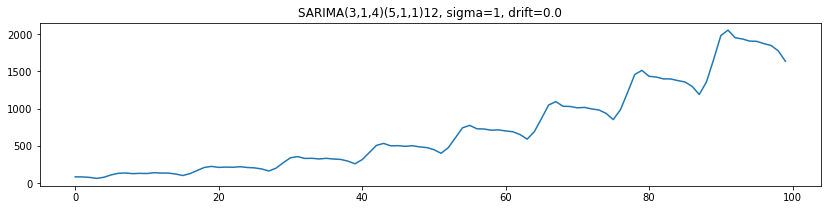

In [129]:
s1 = pd.Series(model.generate(100))
s1.plot(title=f'{str(model)}',figsize=(14,3));

### Let's generate some clusters of TS

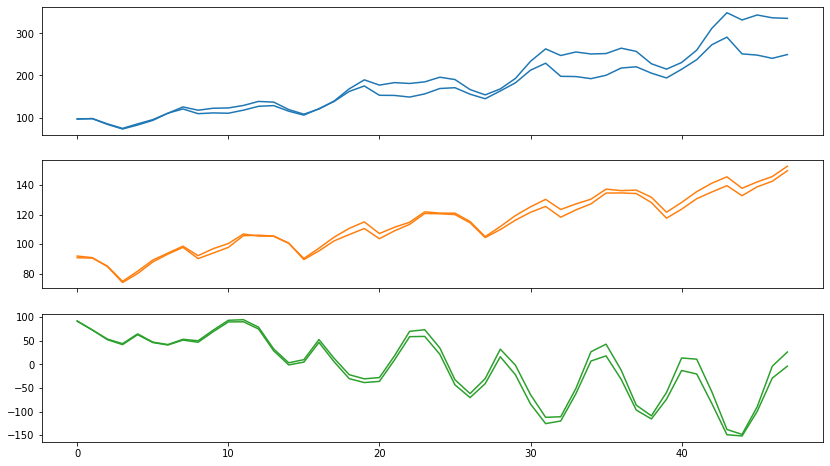

In [130]:
param_list = [{'pcoeff' : [0.6,0.1,0.2,-0.5],  'qcoeff' : [1.0,0.5,0.4,0.3],'d' : 1, 
               'Pcoeff' : [0.6,0.2,0.1,-0.05], 'Qcoeff' : [0.1], 'D':1,'m' : 12,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff },
             {'pcoeff' : [0.6],  'qcoeff' : [0.5,0.4],'d' : 1, 
               'Pcoeff' : [-0.05], 'Qcoeff' : [0.5], 'D':1,'m' : 12,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff },
             {'pcoeff' : [1,-1],  'qcoeff' : [],'d' : 1, 
               'Pcoeff' : [1,-1], 'Qcoeff' : [], 'D':1,'m' : 12,             
               'sigma'  : 0.5 , 'x_buff' : x_buff , 'e_buff' : e_buff }]
samples_per_model = 2

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ma = SARIMA(**params)
        list_of_series.append(pd.Series(ma.generate(48),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));

### Credits

notebook by Marcello Morchio 2021

repository https://github.com/mallibus/pynuTS

In [132]:
random.seed(1)
# see note on qcoeff signum on TestMA.test_seeded_run
m = SARIMA(pcoeff=[1,-1],d=2,qcoeff=[-1,-1,-1,-1,-1],
           m=3,Pcoeff=[1,-1],D=1,Qcoeff=[-1,-1,-1,-1,-1])
x = m.generate(10)
x

[1.2881847531554629,
 6.602184621321623,
 17.457781022136516,
 35.73313561987769,
 65.04679227217986,
 107.36947511604666,
 162.8903693205431,
 230.91236926211474,
 311.1078429108742,
 401.71970861069417]